<a href="https://colab.research.google.com/github/satishkushtagi03765-dot/Credit-risk-modelling/blob/main/Banking_credit_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [308]:
#https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Give%20me%20some%20Credit/cs-training.csv

In [309]:
  import pandas as pd
  loans=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Give%20me%20some%20Credit/cs-training.csv")

In [310]:
loans.shape

(150000, 12)

In [311]:
loans.describe()

,Sr_No,SeriousDlqin2yrs,monthly_utilization,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [312]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Sr_No                                 150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   monthly_utilization                   150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [313]:
loans.columns

Index(['Sr_No', 'SeriousDlqin2yrs', 'monthly_utilization', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [314]:
loans.head()

,Sr_No,SeriousDlqin2yrs,monthly_utilization,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [315]:
#Data exploration

In [316]:
#categorical and discrete variables we explore them by --frequency tables
#Continuous variables--percentiles, Box plot

In [317]:
loans['SeriousDlqin2yrs'].value_counts()

,count
SeriousDlqin2yrs,
0,139974
1,10026


In [318]:
loans['age'].value_counts()
#look at the percentiles to get a better idea later on

,count
age,
49,3837
48,3806
50,3753
47,3719
63,3719
...,...
102,3
109,2
107,1


In [319]:
loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

,count
NumberOfTime30-59DaysPastDueNotWorse,
0,126018
1,16033
2,4598
3,1754
4,747
5,342
98,264
6,140
7,54


In [320]:
# 96 and 98 are errors in the variables in NumberOfTime30-59DaysPastDueNotWorse because in 24 months how the customer can made 96 and 98 late payments
# we need to clean the data

In [321]:
# Open credit line
loans['NumberOfOpenCreditLinesAndLoans'].value_counts()

,count
NumberOfOpenCreditLinesAndLoans,
6,13614
7,13245
5,12931
8,12562
4,11609
9,11355
10,9624
3,9058
11,8321


In [322]:
# Outliers present in no of credit lines and loans - above 10 are outliers in india in US more than 20 are outliers
#It should be decided as regulator or business partners

In [323]:
loans['NumberOfTimes90DaysLate'].value_counts()

,count
NumberOfTimes90DaysLate,
0,141662
1,5243
2,1555
3,667
4,291
98,264
5,131
6,80
7,38


In [324]:
# 24 months- 24 bills a customer max to max can made the payments late for 24 times
# 96 and 98 are the errors this needs to be cleaned

In [325]:
loans['NumberRealEstateLoansOrLines'].value_counts()

,count
NumberRealEstateLoansOrLines,
0,56188
1,52338
2,31522
3,6300
4,2170
5,689
6,320
7,171
8,93


In [326]:
# Outliers present in no of realestate lines and loans - above 10 are errors (for project purpose more than 10 loans are outliers)
#It should also be decided as regulator or business partners

In [327]:
loans['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

,count
NumberOfTime60-89DaysPastDueNotWorse,
0,142396
1,5731
2,1118
3,318
98,264
4,105
5,34
6,16
7,9


In [328]:
loans['NumberOfDependents'].value_counts()

,count
NumberOfDependents,
0.0,86902
1.0,26316
2.0,19522
3.0,9483
4.0,2862
5.0,746
6.0,158
7.0,51
8.0,24


In [329]:
loans['NumberOfDependents'].isnull().sum()

np.int64(3924)

In [330]:
#Continuous Variables-percentiles,boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7dd0adfed010>,
 'caps': [<matplotlib.lines.Line2D at 0x7dd0adbbb8f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dd0adf3a6f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7dd0adbba360>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dd0adbbb740>],
 'means': []}

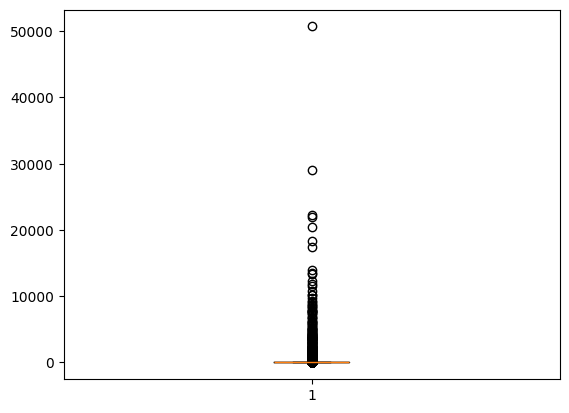

In [331]:
import matplotlib.pyplot as plt
plt.boxplot(loans['monthly_utilization'])

In [332]:
#[0-1]
Utlil_percentiles=loans['monthly_utilization'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.94,0.96,0.97,0.98,1])
Utlil_percentiles

,monthly_utilization
0.10,0.002969
0.20,0.019222
0.30,0.043461
0.40,0.083181
0.50,0.154181
0.60,0.271493
0.70,0.445136
0.80,0.698857
0.90,0.981278
0.91,1.000000


In [333]:
#97% of the data is clean
#3% of the data has issues

{'whiskers': [<matplotlib.lines.Line2D at 0x7dd0adb80e00>,
 'caps': [<matplotlib.lines.Line2D at 0x7dd0adb81370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dd0adbb8ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7dd0adb81880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dd0adb81b50>],
 'means': []}

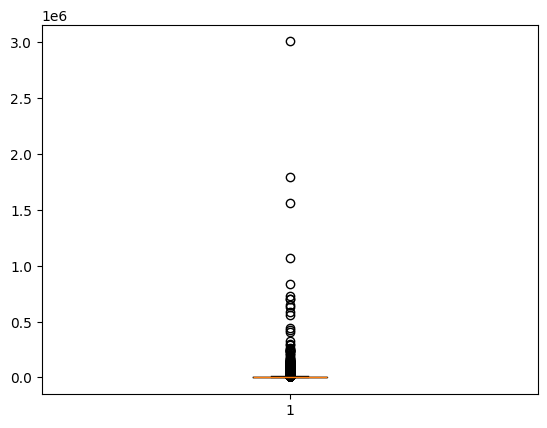

In [334]:
#Monthly_income
Non_null_monthly_income=loans['MonthlyIncome'][loans['MonthlyIncome'].isnull()==False]
plt.boxplot(Non_null_monthly_income)

In [335]:
# Count of missing values
loans['MonthlyIncome'].isnull().sum()

np.int64(29731)

In [336]:
29731/len(loans)

0.19820666666666667

In [337]:
#19.8% of the data is missing in monthly income

{'whiskers': [<matplotlib.lines.Line2D at 0x7dd0adaf8800>,
 'caps': [<matplotlib.lines.Line2D at 0x7dd0adaf8e00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7dd0adaf8500>],
 'medians': [<matplotlib.lines.Line2D at 0x7dd0adaf9370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dd0adaf95e0>],
 'means': []}

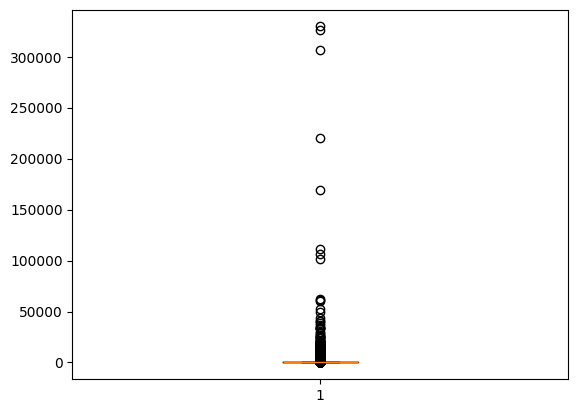

In [338]:
# Debt ratio
plt.boxplot(loans['DebtRatio'])

Data Cleaning

In [339]:
# 97% clean
# 3% Issues

#Replace with median -Aka Imputation

Median_util=loans['monthly_utilization'].median()
Median_util

0.154180737

In [340]:
loans["util_new"]=loans["monthly_utilization"]
loans["util_new"][loans["util_new"]>1]=Median_util

/tmp/ipython-input-3850668485.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans["util_new"][loans["util_new"]>1]=Median_util
/tmp/ipython-input-3850668485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [341]:
loans['util_new'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.96,0.97,0.98,1])

,util_new
0.10,0.002969
0.20,0.019222
0.30,0.043461
0.40,0.083181
0.50,0.154178
0.60,0.241406
0.70,0.401448
0.80,0.634723
0.90,0.930559
0.95,1.000000


In [342]:
loans['util_new'].describe()

,util_new
count,150000.000000
mean,0.300469
std,0.334855
min,0.000000
25%,0.029867
50%,0.154178
75%,0.506929
max,1.000000


In [343]:
#Cleaning of number of times 30-59 DPD- one month late frequency
#96 and 98
cross_tab=pd.crosstab(loans['NumberOfTime30-59DaysPastDueNotWorse'],loans['SeriousDlqin2yrs'])
cross_tab

SeriousDlqin2yrs,0,1
NumberOfTime30-59DaysPastDueNotWorse,,
0,120977,5041
1,13624,2409
2,3379,1219
3,1136,618
4,429,318
5,188,154
6,66,74
7,26,28
8,17,8


In [344]:
#Row wise percent
round(cross_tab.apply(lambda x:x/x.sum(),axis=1),2)

SeriousDlqin2yrs,0,1
NumberOfTime30-59DaysPastDueNotWorse,,
0,0.96,0.04
1,0.85,0.15
2,0.73,0.27
3,0.65,0.35
4,0.57,0.43
5,0.55,0.45
6,0.47,0.53
7,0.48,0.52
8,0.68,0.32


In [345]:
loans['num_30_59_days_dpd']=loans['NumberOfTime30-59DaysPastDueNotWorse']
loans['num_30_59_days_dpd'][loans['num_30_59_days_dpd']>13]=6

/tmp/ipython-input-588439752.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans['num_30_59_days_dpd'][loans['num_30_59_days_dpd']>13]=6
/tmp/ipython-input-588439752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [346]:
loans['num_30_59_days_dpd'].value_counts()

,count
num_30_59_days_dpd,
0,126018
1,16033
2,4598
3,1754
4,747
6,409
5,342
7,54
8,25


In [347]:
#Monthly_income
# 20% missing values
# 80% Clean

#Needed
# Flag varaible

loans['monthly_income_ind']=1
loans['monthly_income_ind'][loans['MonthlyIncome'].isnull()]=0
loans['monthly_income_ind'].value_counts()

/tmp/ipython-input-2370499274.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans['monthly_income_ind'][loans['MonthlyIncome'].isnull()]=0
/tmp/ipython-input-2370499274.py:9: SettingWithCopyWarning: 
A value is trying to be set on a co

,count
monthly_income_ind,
1,120269
0,29731


In [348]:
# Imputation with median
loans['monthly_income_new']=loans['MonthlyIncome']
loans['monthly_income_new'][loans['MonthlyIncome'].isnull()]=loans['MonthlyIncome'].median()
loans['monthly_income_new'].isnull().sum()

/tmp/ipython-input-787331051.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans['monthly_income_new'][loans['MonthlyIncome'].isnull()]=loans['MonthlyIncome'].median()
/tmp/ipython-input-787331051.py:3: SettingWithCopyWarning: 
A value

np.int64(0)

In [349]:
loans.columns

Index(['Sr_No', 'SeriousDlqin2yrs', 'monthly_utilization', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'util_new', 'num_30_59_days_dpd',
       'monthly_income_ind', 'monthly_income_new'],
      dtype='object')

In [350]:
#Age
loans['age'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.93,0.95,0.96,0.97,0.98,0.99,1])
#Max age-80
#1% outliers on low side
#3% are above 80 are outliers

# Different technique to handle age outliers is flooring and capping
#Replace low side outliers with minimum value-21
#anybody below 21 will be replaced with 21- flooring
# Max allowed age is 80
#anybody above 80 will be replaced with 80 -Capping

# Flooring

loans['Age_new']=loans['age']
loans['Age_new'][loans['age']<21]=21

#capping
loans['Age_new'][loans['age']>80]=80

loans['Age_new'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.93,0.95,0.96,0.97,0.98,0.99,1])

/tmp/ipython-input-4086025591.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans['Age_new'][loans['age']<21]=21
/tmp/ipython-input-4086025591.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,Age_new
0.00,21.0
0.10,33.0
0.20,39.0
0.30,44.0
0.40,48.0
0.50,52.0
0.60,56.0
0.70,61.0
0.80,65.0
0.90,72.0


In [351]:
# Debt ratio
loans['DebtRatio'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.71,0.72,0.73,0.75,0.76,0.77,0.78,0.8,0.9,1])

,DebtRatio
0.00,0.000000
0.10,0.030874
0.20,0.133773
0.30,0.213697
0.40,0.287460
0.50,0.366508
0.60,0.467506
0.70,0.649189
0.71,0.678073
0.72,0.711772


In [352]:
# 76% of the data is clean
# 24% of the data has outliers

#flag_variable
loans['Debtratio_ind']=1
loans['Debtratio_ind'][loans['DebtRatio']>1.5]=0

#Imputation
loans['DebtRatio_new']=loans['DebtRatio']
loans['DebtRatio_new'][loans['DebtRatio_new']>1.5]=loans['DebtRatio'].median()

/tmp/ipython-input-3750974884.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans['Debtratio_ind'][loans['DebtRatio']>1.5]=0
/tmp/ipython-input-3750974884.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [353]:
loans['DebtRatio_new'].describe()

,DebtRatio_new
count,150000.000000
mean,0.334851
std,0.236165
min,0.000000
25%,0.175074
50%,0.366506
75%,0.398985
max,1.500000


In [354]:
#Number of open creditlines or loans cleaning
# we should consider as per the regulators or business partners suggestion
# for this projct purpose we are considering 20 is the limits for loans per customer more,than 20 loans are outliers

loans['NumberOfOpenCreditLinesAndLoans'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.92,0.94,0.96,0.97,0.98,1])

# here 3% are more than 20 loans so replace with meadian

,NumberOfOpenCreditLinesAndLoans
0.00,0.0
0.10,3.0
0.20,4.0
0.30,5.0
0.40,6.0
0.50,8.0
0.60,9.0
0.70,10.0
0.80,12.0
0.90,15.0


In [355]:
loans['no_of_loans']=loans['NumberOfOpenCreditLinesAndLoans']
loans['no_of_loans'][loans['no_of_loans']>20]=loans['NumberOfOpenCreditLinesAndLoans'].median()

/tmp/ipython-input-3494970993.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans['no_of_loans'][loans['no_of_loans']>20]=loans['NumberOfOpenCreditLinesAndLoans'].median()
/tmp/ipython-input-3494970993.py:2: SettingWithCopyWarning: 
A 

In [356]:
loans['no_of_loans'].describe()

,no_of_loans
count,150000.000000
mean,8.009433
std,4.326973
min,0.000000
25%,5.000000
50%,8.000000
75%,11.000000
max,20.000000


In [357]:
# no of times 90 days DPD

In [358]:
loans['NumberOfTimes90DaysLate'].value_counts()

,count
NumberOfTimes90DaysLate,
0,141662
1,5243
2,1555
3,667
4,291
98,264
5,131
6,80
7,38


In [359]:
Crosstab_90daysdpd=pd.crosstab(loans['NumberOfTimes90DaysLate'],loans['SeriousDlqin2yrs'])
round(Crosstab_90daysdpd.apply(lambda x:x/x.sum(),axis=1),2)

SeriousDlqin2yrs,0,1
NumberOfTimes90DaysLate,,
0,0.95,0.05
1,0.66,0.34
2,0.50,0.50
3,0.42,0.58
4,0.33,0.67
5,0.37,0.63
6,0.40,0.60
7,0.18,0.82
8,0.29,0.71


In [360]:
loans['no_of_days_90dpd']=loans['NumberOfTimes90DaysLate']
loans['no_of_days_90dpd'][loans['no_of_days_90dpd']>17]=3
loans['no_of_days_90dpd'].value_counts()

/tmp/ipython-input-3781603671.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans['no_of_days_90dpd'][loans['no_of_days_90dpd']>17]=3
/tmp/ipython-input-3781603671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,count
no_of_days_90dpd,
0,141662
1,5243
2,1555
3,936
4,291
5,131
6,80
7,38
8,21


In [361]:
# No of real estate loans(home loans)
# its depends based on the business partners or regulators
# here we are considering 4 is the maximum limit so anything above 4 is considered as outliers

loans['NumberRealEstateLoansOrLines'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.92,0.94,0.96,0.97,0.98,0.99,1])

,NumberRealEstateLoansOrLines
0.00,0.0
0.10,0.0
0.20,0.0
0.30,0.0
0.40,1.0
0.50,1.0
0.60,1.0
0.70,1.0
0.80,2.0
0.90,2.0


In [362]:
loans['real_estate_loans_new']=loans['NumberRealEstateLoansOrLines']
loans['real_estate_loans_new'][loans['real_estate_loans_new']>4]=loans['NumberRealEstateLoansOrLines'].median()
loans['real_estate_loans_new'].describe()

/tmp/ipython-input-4148026989.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans['real_estate_loans_new'][loans['real_estate_loans_new']>4]=loans['NumberRealEstateLoansOrLines'].median()
/tmp/ipython-input-4148026989.py:2: SettingWith

,real_estate_loans_new
count,150000.000000
mean,0.962960
std,0.938918
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


In [363]:
# Number of dependents
# its depends based on the business partners or regulators
# here we are considering 10 is the maximum limit so anything above 10 is considered as outliers

loans['NumberOfDependents'].isnull().sum()


np.int64(3924)

In [364]:
loans['NumberOfDependents_new']=loans['NumberOfDependents']
loans['NumberOfDependents_new'][(loans['NumberOfDependents_new']>10)|(loans['NumberOfDependents'].isnull())]=loans['NumberOfDependents'].median()
loans['NumberOfDependents_new'].describe()

/tmp/ipython-input-1082583127.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  loans['NumberOfDependents_new'][(loans['NumberOfDependents_new']>10)|(loans['NumberOfDependents'].isnull())]=loans['NumberOfDependents'].median()
/tmp/ipython-

,NumberOfDependents_new
count,150000.000000
mean,0.737193
std,1.105454
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,10.000000


**Exporting the final dataset**

In [365]:
loans.to_csv("loans_cleaned.csv")

In [366]:
#how to check the file where it is expor
import os
loans.to_csv("loans_cleaned.csv")
print(os.getcwd())

/content


In [367]:
loans.describe()

,Sr_No,SeriousDlqin2yrs,monthly_utilization,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,...,num_30_59_days_dpd,monthly_income_ind,monthly_income_new,Age_new,Debtratio_ind,DebtRatio_new,no_of_loans,no_of_days_90dpd,real_estate_loans_new,NumberOfDependents_new
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,...,0.256113,0.801793,6.418455e+03,52.120107,0.786180,0.334851,8.009433,0.095673,0.962960,0.737193
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,...,0.738442,0.398650,1.289040e+04,14.389372,0.410003,0.236165,4.326973,0.500468,0.938918,1.105454
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,...,0.000000,1.000000,3.903000e+03,41.000000,1.000000,0.175074,5.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,...,0.000000,1.000000,5.400000e+03,52.000000,1.000000,0.366506,8.000000,0.000000,1.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,...,0.000000,1.000000,7.400000e+03,63.000000,1.000000,0.398985,11.000000,0.000000,2.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,...,13.000000,1.000000,3.008750e+06,80.000000,1.000000,1.500000,20.000000,17.000000,4.000000,10.000000


**Phase 3 - Model Building**

In [369]:
model=sm.Logit(y_train,x_train).fit()
print(model.summary())

NameError: name 'sm' is not defined

In [370]:
# Create a new DataFrame with cleaned variables
cleaned_loans_data = loans[['SeriousDlqin2yrs', 'util_new', 'Age_new', 'DebtRatio_new', 'monthly_income_new', 'no_of_loans', 'no_of_days_90dpd', 'real_estate_loans_new', 'NumberOfDependents_new', 'monthly_income_ind', 'Debtratio_ind']]
display(cleaned_loans_data.head())

,SeriousDlqin2yrs,util_new,Age_new,DebtRatio_new,monthly_income_new,no_of_loans,no_of_days_90dpd,real_estate_loans_new,NumberOfDependents_new,monthly_income_ind,Debtratio_ind
0,1,0.766127,45,0.802982,9120.0,13,0,1,2.0,1,1
1,0,0.957151,40,0.121876,2600.0,4,0,0,1.0,1,1
2,0,0.658180,38,0.085113,3042.0,2,1,0,0.0,1,1
3,0,0.233810,30,0.036050,3300.0,5,0,0,0.0,1,1
4,0,0.907239,49,0.024926,63588.0,7,0,1,0.0,1,1


Now you can export this cleaned DataFrame to a new CSV file:

In [371]:
cleaned_loans_data.to_csv("loans_cleaned_variables.csv", index=False)

To import the cleaned data back into a DataFrame, you can use the following code:

In [372]:
cleaned_loans = pd.read_csv("loans_cleaned_variables.csv")
display(cleaned_loans.head())

,SeriousDlqin2yrs,util_new,Age_new,DebtRatio_new,monthly_income_new,no_of_loans,no_of_days_90dpd,real_estate_loans_new,NumberOfDependents_new,monthly_income_ind,Debtratio_ind
0,1,0.766127,45,0.802982,9120.0,13,0,1,2.0,1,1
1,0,0.957151,40,0.121876,2600.0,4,0,0,1.0,1,1
2,0,0.658180,38,0.085113,3042.0,2,1,0,0.0,1,1
3,0,0.233810,30,0.036050,3300.0,5,0,0,0.0,1,1
4,0,0.907239,49,0.024926,63588.0,7,0,1,0.0,1,1


**Phase 3 - Model Building**

**#Logistic Regression Model Building"**

In [373]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from sklearn.model_selection import train_test_split


In [374]:
x=cleaned_loans.drop(['SeriousDlqin2yrs'],axis=1)
y=cleaned_loans['SeriousDlqin2yrs']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=111)


In [375]:
model=sm.Logit(y_train,x_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.216259
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               120000
Model:                          Logit   Df Residuals:                   119990
Method:                           MLE   Df Model:                            9
Date:                Tue, 28 Oct 2025   Pseudo R-squ.:                  0.1265
Time:                        19:06:25   Log-Likelihood:                -25951.
converged:                       True   LL-Null:                       -29710.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
util_new                   1.0068      0.032     31.725      0.000       0.945      

**Phase 4- Model Validation**

In [376]:
# Accuracy

Pred_train=model.predict(x_train)
Pred_test=model.predict(x_test)


In [ ]:
#*The confusion matrix is used to evaluate the performance of a classification model. It compares the predicted class labels from your model to the actual class labels.

#Here's why we use y_train and y_test and not x_train and x_test:

#*y_train and y_test: These contain the actual, true outcomes (in your case, whether someone was "SeriousDlqin2yrs" or not) for your training and testing datasets, respectively. This is the ground truth that your model is trying to predict.
#*x_train and x_test: These contain the features or input variables (like age, debt ratio, etc.) that the model uses to make predictions. They are not the actual outcomes themselves.
#The confusion matrix needs to compare what your model predicted (Pred_train and Pred_test,
#-which are based on x_train and x_test) against what the outcome actually was (y_train and y_test).
#It tells you how many predictions were correct (True Positives and True Negatives) and how many were incorrect (False Positives and False Negatives) for each class.
#You can't do this comparison using the features (x_train, x_test) because they don't represent the outcome you're trying to predict.

#*Think of it like a test: x_test is the set of questions you give to a student (your model), y_test is the answer key, and Pred_test is the student's answers.
#The confusion matrix is how you grade the test – by comparing the student's answers (Pred_test) to the answer key (y_test). You wouldn't compare the student's answers to the questions themselves (x_test)!



In [377]:
# Confusion_matrix

from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_train,np.round(Pred_train))

array([[111200,    679],
       [  7208,    913]])

In [378]:
acc=accuracy_score(y_train,np.round(Pred_train))
print("Train_accuracy",acc)

Train_accuracy 0.934275


In [379]:
confusion_matrix(y_test,np.round(Pred_test))


array([[27947,   148],
       [ 1688,   217]])

In [380]:
Test_acc=accuracy_score(y_test,np.round(Pred_test))
print('Test_accuracy',Test_acc)

Test_accuracy 0.9388


In [381]:
#Multicollinearity check (The variables feature selection and feature elimination)
# VIF > 5 it indicates multicollinearity

import statsmodels.api as sm
import statsmodels.formula.api as smf # Import statsmodels.formula.api
def Vif_cal(input_data,dependent_col):
  x_vars=input_data.drop([dependent_col],axis=1)
  xvar_names=x_vars.columns
  for i in range(0,xvar_names.shape[0]):
    y=x_vars[xvar_names[i]]
    x=x_vars[xvar_names.drop(xvar_names[i])]
    rsq=smf.ols(formula="y~x",data=x_vars).fit().rsquared # Use smf.ols
    Vif=round(1/(1-rsq),2)
    print(xvar_names[i],"Vif=",Vif)

In [382]:
Vif_cal(cleaned_loans, "SeriousDlqin2yrs")

util_new Vif= 1.16
Age_new Vif= 1.16
DebtRatio_new Vif= 1.36
monthly_income_new Vif= 1.04
no_of_loans Vif= 1.33
no_of_days_90dpd Vif= 1.05
real_estate_loans_new Vif= 1.46
NumberOfDependents_new Vif= 1.12
monthly_income_ind Vif= 4.56
Debtratio_ind Vif= 4.47


In [383]:
# VIF>5 is dangerous sign
#Independent

In [384]:
#P-value impact of the features on y

import statsmodels.api as sm

model=sm.Logit(y_train,x_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.216259
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               120000
Model:                          Logit   Df Residuals:                   119990
Method:                           MLE   Df Model:                            9
Date:                Tue, 28 Oct 2025   Pseudo R-squ.:                  0.1265
Time:                        19:06:58   Log-Likelihood:                -25951.
converged:                       True   LL-Null:                       -29710.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
util_new                   1.0068      0.032     31.725      0.000       0.945      

**Final Model**

In [385]:
#Drop Real estate loans new based on P-value>0.05

x=cleaned_loans.drop(['SeriousDlqin2yrs','real_estate_loans_new'],axis=1)
y=cleaned_loans['SeriousDlqin2yrs']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=111)


In [386]:
model=sm.Logit(y_train,x_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.216260
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               120000
Model:                          Logit   Df Residuals:                   119991
Method:                           MLE   Df Model:                            8
Date:                Tue, 28 Oct 2025   Pseudo R-squ.:                  0.1265
Time:                        19:07:32   Log-Likelihood:                -25951.
converged:                       True   LL-Null:                       -29710.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
util_new                   1.0048      0.031     31.966      0.000       0.943      

In [387]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

train_accuracy=accuracy_score(y_train,np.round(train_pred))
test_accuracy=accuracy_score(y_test,np.round(test_pred))

print("train_accuracy",train_accuracy)
print("test_accuracy",test_accuracy)


train_accuracy 0.9342583333333333
test_accuracy 0.9388


In [388]:
# Overall accuracy- Not important
# Class 0- good- not important
# Class 1-Bad- very importnant


# Classwise accuracy on train data

cm_train=confusion_matrix(y_train,np.round(train_pred))
print(cm_train)

# Class-0 accuracy

class_0_accuracy=cm_train[0,0]/(cm_train[0,0]+cm_train[0,1])
print("Class 0 accuracy",class_0_accuracy)

# Class-1 accuracy

class_1_accuracy=cm_train[1,1]/(cm_train[1,0]+cm_train[1,1])
print("Class 1 accuracy",class_1_accuracy)


[[111198    681]
 [  7208    913]]
Class 0 accuracy 0.9939130667953772
Class 1 accuracy 0.11242457825390961


In [389]:
y.value_counts()

,count
SeriousDlqin2yrs,
0,139974
1,10026


In [390]:
y.value_counts()/len(y)

,count
SeriousDlqin2yrs,
0,0.93316
1,0.06684


In [392]:
#Class imbalance
# One of the best technique for handling class imbalance is SMOTE Technique
#SMOTE- synthetic minority over sampling technique-- repeating those samples and making duplicate of them

from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=0.6,random_state=44)
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [393]:
#Before smote

y_train.value_counts()

,count
SeriousDlqin2yrs,
0,111879
1,8121


In [394]:
# After smote
y_train_smote.value_counts()


,count
SeriousDlqin2yrs,
0,111879
1,67127


In [396]:
# Model building on balanced data -- Smote

model=sm.Logit(y_train_smote,x_train_smote).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.534599
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               179006
Model:                          Logit   Df Residuals:                   178997
Method:                           MLE   Df Model:                            8
Date:                Tue, 28 Oct 2025   Pseudo R-squ.:                  0.1919
Time:                        19:32:57   Log-Likelihood:                -95696.
converged:                       True   LL-Null:                   -1.1842e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
util_new                   1.8681      0.016    116.959      0.000       1.837      

In [399]:
# Confusion matrix and accuracy

train_pred=model.predict(x_train_smote)
test_pred=model.predict(x_test)

# Confusion matrix
train_cm=confusion_matrix(y_train_smote,np.round(train_pred))
test_cm=confusion_matrix(y_test,np.round(test_pred))

print("train confusion matrix\n",train_cm)
print("test confusion matrix\n",test_cm)


train confusion matrix
 [[94538 17341]
 [31653 35474]]
test confusion matrix
 [[23620  4475]
 [  785  1120]]


In [401]:
# Class 0 and Class 1 accuracy

Class_0_acc=train_cm[0,0]/(train_cm[0,0]+train_cm[0,1])
Class_1_acc=train_cm[1,1]/(train_cm[1,0]+train_cm[1,1])

print("Class 0 accuracy",Class_0_acc)
print("Class 1 accuracy",Class_1_acc)

Class 0 accuracy 0.8450021898658372
Class 1 accuracy 0.5284609769541317


In [ ]:
# Good model